In [1]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [14]:
import sqlite3

conn = sqlite3.connect("../db.sqlite3")

query = """
SELECT
    r_order.id AS order_id,
    r_order.datetime AS order_datetime,
    r_orderitem.quantity,
    r_product.id AS product_id,
    r_product.price AS product_price,
    r_product.name AS product_name
FROM restaurant_order as r_order
JOIN restaurant_orderitem as r_orderitem on r_order.id = r_orderitem.order_id
JOIN restaurant_product as r_product on r_product.id = r_orderitem.product_id
"""
combined_df = pd.read_sql_query(query, conn)
conn.close()

column_names = ["order_id", "order_datetime", "quantity", "product_id", "product_price", "product_name"]

combined_df.to_csv("restaurant_data.csv", index=False, columns=column_names)

df = pd.read_csv("restaurant_data.csv")
df.head()

,order_id,order_datetime,quantity,product_id,product_price,product_name
0,1,2019-08-03 20:25:00,2,6,0.80,Plain Papadum
1,1,2019-08-03 20:25:00,1,240,12.95,King Prawn Balti
2,1,2019-08-03 20:25:00,1,19,2.95,Garlic Naan
3,1,2019-08-03 20:25:00,1,36,3.95,Mushroom Rice
4,1,2019-08-03 20:25:00,1,111,8.95,Paneer Tikka Masala


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

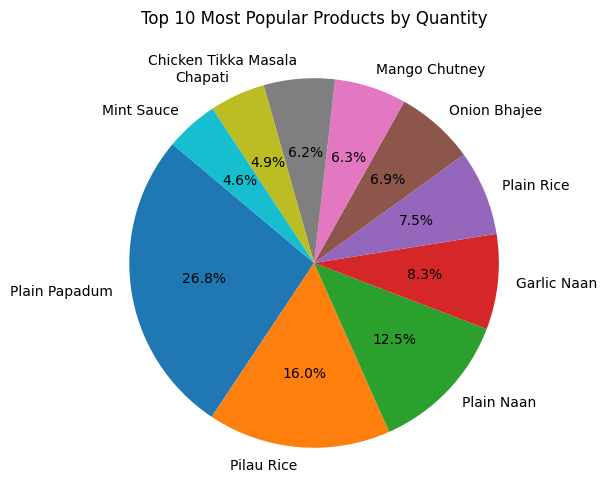

In [19]:
import matplotlib.pyplot as plt

top_products = df.groupby("product_name")["quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
top_products.plot.pie(autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Most Popular Products by Quantity")
plt.ylabel("")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

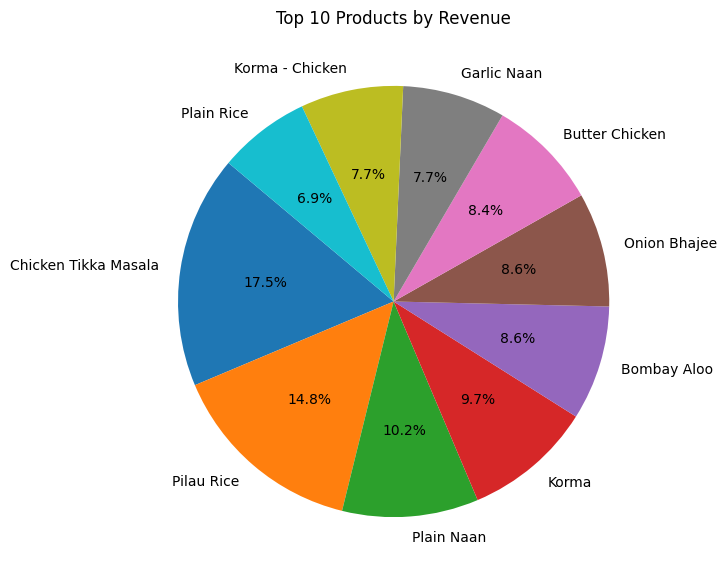

In [21]:
df["item_price"] = df["product_price"] * df["quantity"]
top_products_by_revenue = df.groupby("product_name")["item_price"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 7))
top_products_by_revenue.plot.pie(autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Products by Revenue")
plt.ylabel("")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

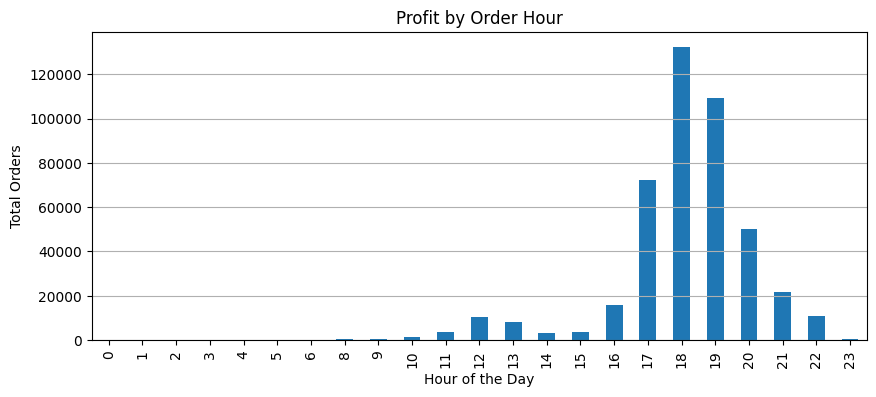

In [28]:
df["Order Hour"] = df["order_datetime"].dt.hour

df.groupby("Order Hour")["item_price"].sum().plot.bar(figsize=(10, 4), title="Profit by Order Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Orders")
plt.grid(axis="y")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

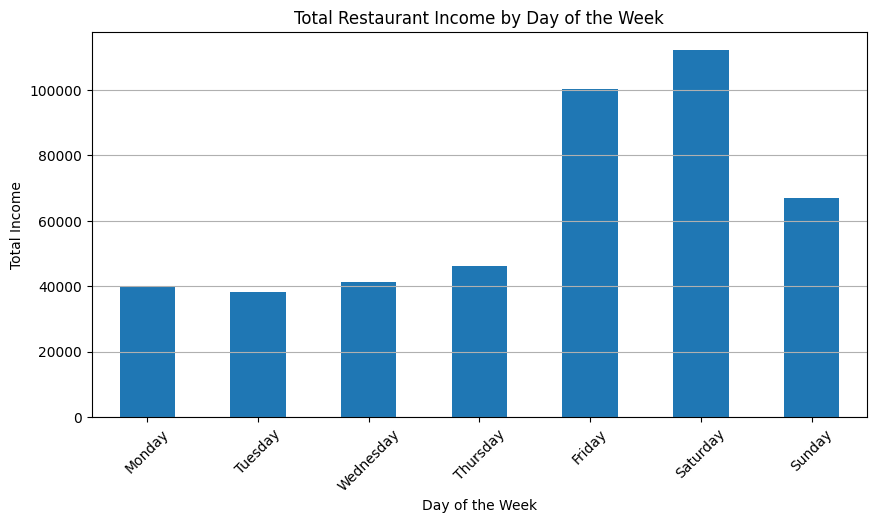

In [29]:
df["order_day_of_week"] = df["order_datetime"].dt.day_name()

weekly_revenue = df.groupby("order_day_of_week")["item_price"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10, 5))
weekly_revenue.plot.bar()
plt.title("Total Restaurant Income by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()